# 2021/W7: ​What's the point of Valentine's Day?

In [2]:
import glob
import os
import time
import datetime as dt

# handy table manipulatation
import numpy as np
import pandas as pd

# initialize the graphics environment for matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#from ggplot import *
%matplotlib inline
plt.style.use('ggplot')

In [3]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

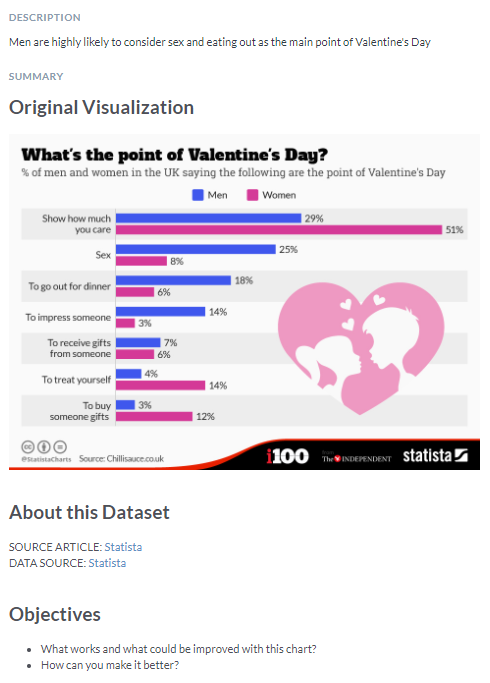

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "original.png")

In [5]:
# import data
df = pd.read_excel('https://query.data.world/s/wkthvrj7rq4lw45cbnnkmczhh5tscf')
df

,Point,Men,Women
0,Show how much you care,0.29,0.51
1,Sex,0.25,0.08
2,To go out for dinner,0.18,0.06
3,To impress someone,0.14,0.03
4,To receive gifts from someone,0.07,0.06
5,To treat yourself,0.04,0.14
6,To buy someone gifts,0.03,0.12


In [6]:
df.set_index('Point', inplace=True)

In [7]:
df['Total'] = df['Men'] + df['Women']
df

,Men,Women,Total
Point,,,
Show how much you care,0.29,0.51,0.80
Sex,0.25,0.08,0.33
To go out for dinner,0.18,0.06,0.24
To impress someone,0.14,0.03,0.17
To receive gifts from someone,0.07,0.06,0.13
To treat yourself,0.04,0.14,0.18
To buy someone gifts,0.03,0.12,0.15


In [8]:
df['Men'].sum(), df['Women'].sum(), df['Total'].sum()

(1.0, 1.0, 1.9999999999999998)

## ~~Power of Love~~ Differences of the Sexes
I can't find the actual head counts tied to these numbers so can't do what I planned to do and look at the combined support for the different ways to "show love". So that leaves me with looking at the differences instead.

In [9]:
df['Difference'] = df['Men'] - df['Women']
df

,Men,Women,Total,Difference
Point,,,,
Show how much you care,0.29,0.51,0.80,-0.22
Sex,0.25,0.08,0.33,0.17
To go out for dinner,0.18,0.06,0.24,0.12
To impress someone,0.14,0.03,0.17,0.11
To receive gifts from someone,0.07,0.06,0.13,0.01
To treat yourself,0.04,0.14,0.18,-0.10
To buy someone gifts,0.03,0.12,0.15,-0.09


In [10]:
df['Diff_Abs'] = abs(df['Men'] - df['Women'])
df

,Men,Women,Total,Difference,Diff_Abs
Point,,,,,
Show how much you care,0.29,0.51,0.80,-0.22,0.22
Sex,0.25,0.08,0.33,0.17,0.17
To go out for dinner,0.18,0.06,0.24,0.12,0.12
To impress someone,0.14,0.03,0.17,0.11,0.11
To receive gifts from someone,0.07,0.06,0.13,0.01,0.01
To treat yourself,0.04,0.14,0.18,-0.10,0.10
To buy someone gifts,0.03,0.12,0.15,-0.09,0.09


In [11]:
df.sort_values('Diff_Abs', ascending=False)

,Men,Women,Total,Difference,Diff_Abs
Point,,,,,
Show how much you care,0.29,0.51,0.80,-0.22,0.22
Sex,0.25,0.08,0.33,0.17,0.17
To go out for dinner,0.18,0.06,0.24,0.12,0.12
To impress someone,0.14,0.03,0.17,0.11,0.11
To treat yourself,0.04,0.14,0.18,-0.10,0.10
To buy someone gifts,0.03,0.12,0.15,-0.09,0.09
To receive gifts from someone,0.07,0.06,0.13,0.01,0.01


In [12]:
df['Pleasure_Direction'] = ['Other', 'Self', 'Other', 'Other', 'Self', 'Other', 'Self']
df = df[['Pleasure_Direction', 'Men', 'Women', 'Total', 'Difference', 'Diff_Abs']] 
df

,Pleasure_Direction,Men,Women,Total,Difference,Diff_Abs
Point,,,,,,
Show how much you care,Other,0.29,0.51,0.80,-0.22,0.22
Sex,Self,0.25,0.08,0.33,0.17,0.17
To go out for dinner,Other,0.18,0.06,0.24,0.12,0.12
To impress someone,Other,0.14,0.03,0.17,0.11,0.11
To receive gifts from someone,Self,0.07,0.06,0.13,0.01,0.01
To treat yourself,Other,0.04,0.14,0.18,-0.10,0.10
To buy someone gifts,Self,0.03,0.12,0.15,-0.09,0.09


In [13]:
df.groupby(['Pleasure_Direction'])['Men', 'Women'].sum()

,Men,Women
Pleasure_Direction,,
Other,0.65,0.74
Self,0.35,0.26


In [16]:
# Let's take sex out of the picture
df[df.index != 'Sex'].groupby(['Pleasure_Direction'])['Men', 'Women'].sum()

,Men,Women
Pleasure_Direction,,
Other,0.65,0.74
Self,0.10,0.18
